In [1]:
import sys 
#sys.path.append('/neurospin/meg/meg_tmp/Calculation_Pedro_2014/scripts/decoding')
sys.path.append('/Users/pinheirochagas/Pedro/NeuroSpin/Experiments/Calc_MEG/scripts_git/Calc_MEG/decoding/')
from ecog2mne_calc import ecog2mne_calc

import numpy as np
from calc_classification import calc_classification

from jr.plot import pretty_gat, pretty_decod
from jr_tweaked.plot import pretty_gat, pretty_decod

import mne
from mne.decoding import GeneralizationAcrossTime

/Users/pinheirochagas/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
#result_path = '/Volumes/NeuroSpin2T/Calculia/validdata/S14_64_SP/data_fieldtrip/decoding/'
#fname_ecog = '/Volumes/NeuroSpin2T/Calculia/validdata/S14_64_SP/data_fieldtrip/S14_64_SP_selected.mat'

result_path = '/Volumes/NeuroSpin2T/Calculia/validdata/S16_94_DR/data_fieldtrip/decoding/'
fname_ecog = '/Volumes/NeuroSpin2T/Calculia/validdata/S16_94_DR/data_fieldtrip/S16_94_DR_selected.mat'

In [12]:
epoch_calc,info_calc = ecog2mne_calc(fname_ecog, 'data')

In [4]:
baseline = (-0.5, -0.05) #time for the baseline period
epoch_calc.apply_baseline(baseline)

downsampling = 2
epoch_calc.decimate(downsampling)

Applying baseline correction (mode: mean)
The measurement information indicates a low-pass frequency of 250 Hz. The decim=100 parameter will result in a sampling frequency of 5 Hz, which can cause aliasing artifacts.


/Users/pinheirochagas/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: The measurement information indicates a low-pass frequency of 250 Hz. The decim=100 parameter will result in a sampling frequency of 5 Hz, which can cause aliasing artifacts.


<EpochsArray  |  n_events : 200 (all good), tmin : -0.5 (s), tmax : 5.5 (s), baseline : (-0.5, -0.05)>

In [13]:
epoch_calc.times


array([-0.5  , -0.498, -0.496, ...,  5.496,  5.498,  5.5  ])

In [ ]:
# condA = info_calc['operand1'] == 2
# condB = info_calc['operand1'] == 3
# condC = info_calc['operand1'] == 4
# condD = info_calc['operand1'] == 7
# condE = info_calc['operand1'] == 8
# condF = info_calc['operand1'] == 9

# #Sanity check #1: Plot evoked response
# evoked_condA = epoch_calc[condA].average() # 
# evoked_condB = epoch_calc[condB].average() #   
# evoked_condC = epoch_calc[condC].average() #   
# evoked_condD = epoch_calc[condD].average() #   
# evoked_condE = epoch_calc[condE].average() #   
# evoked_condF = epoch_calc[condF].average() #   

# evoked_condA.plot()
# evoked_condB.plot()
# evoked_condC.plot()
# evoked_condD.plot()  
# evoked_condC.plot()
# evoked_condD.plot()  

# plt.show()

In [ ]:
condA = info_calc['operand1'] == 3
evoked_condA = epoch_calc[condA].average() # 


In [ ]:
evoked_condA.plot()

In [ ]:
condA = info_calc['operand1'] == 3
condB = info_calc['operand1'] == 4
condC = info_calc['operand1'] == 5
condD = info_calc['operand1'] == 6

#Sanity check #1: Plot evoked response
evoked_condA = epoch_calc[condA].average() # 
evoked_condB = epoch_calc[condB].average() #   
evoked_condC = epoch_calc[condC].average() #   
evoked_condD = epoch_calc[condD].average() #   

evoked_condA.plot()
evoked_condB.plot()
evoked_condC.plot()
evoked_condD.plot()  

plt.show()

In [17]:
trainTimes = {'start': -0.4, 'stop': 3.2}
testTimes = {'start': -0.4, 'stop': 3.2}
params = {'trainTimes': trainTimes, 'testTimes': testTimes}

In [18]:
train_index = (info_calc['operand1'] < 10) 
X_train = epoch_calc[train_index]
y_train = np.array(info_calc[train_index]['operand1'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
mode = 'cross-validation'
params.update({'mode': mode})

In [19]:
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)


[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:   38.7s finished
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed: 55.0min finished
[Parallel(n_jobs=6)]: Done   6 out of   6 | elapsed:  8.7min finished


Populating the interactive namespace from numpy and matplotlib


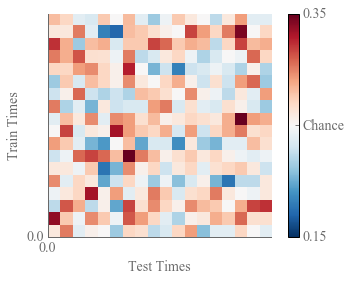

In [10]:
%pylab inline
pretty_gat(score, chance=.25)


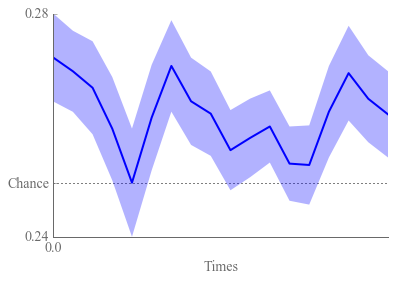

In [11]:
pretty_decod(score, chance=.25, alpha=4, smoothWindow=1, color='blue')

In [ ]:
results = {'params': params, 'times_calc': epoch_calc.times, 'score': score, 'diagonal': diagonal, 'y_train': y_train, 'y_test': y_test}


In [ ]:
params

In [ ]:
fname = result_path + 'decoding_operand1'
np.save(fname, results)

In [ ]:
X_train = epoch_calc
y_train = np.array(info_calc['isCalc'])
y_train = y_train.astype(np.float64)
X_test = X_train
y_test = y_train
trainTimes = {'start': -0.1, 'stop': 4.5}
testTimes = {'start': -0.1, 'stop': 4.5}
mode = 'cross-validation'
params.update({'mode': mode})

In [ ]:
gat, score, diagonal = calc_classification(X_train, y_train, X_test, y_test, params)


In [ ]:
%pylab inline
pretty_gat(score, chance=.5)
plt.show()

In [ ]:
gat.plot_diagonal(chance = .5)

In [ ]:
fname = result_path + 'decoding_operand1'

scores_op1 = np.load(fname + '.npy')

In [ ]:
results = scores_op1.tolist()


In [ ]:
all_scores.append(results['score'])
all_diagonals.append(results['diagonal'])

In [ ]:
score = results['score']
diagonal = results['diagonal']

In [ ]:
scores_op1

In [ ]:
score

In [ ]:
info_calc_train['operand1'].map(lambda x: x[0])